In [2]:
import xml.etree.ElementTree as ET
import matplotlib.pyplot as plt
import numpy
import random
import pandas as pd

def run_this():
    global root
    global indices
    global titles
    global text
    """This section contains the code to be executed"""
    root = parse_file()
    indices = get_articles(root)
    random.seed(8685)
    indices = random.sample(indices,10000)
    indices.sort()
    titles = get_titles(root,indices)
    text = get_text(root,indices)
    """end section"""
    data=get_dataframe(titles, text)
    return data


def parse_file():
    tree = ET.parse('simplewiki-20160701-pages-articles-multistream.xml')
    return tree.getroot()

def get_titles(root,indices):
    return [root[i][0].text for i in indices ]

def get_articles(root):
    indices = []
    for i in range(1,len(root.getchildren())):
        # Remove non-articles (ie help pages, categories, etc.)
        if root[i][1].text == "0":
            # Remove redirect articles
            redirect = root[i].find('{http://www.mediawiki.org/xml/export-0.10/}redirect')
            if redirect is None:
                # Remove articles with fewer than 300 characters
                # Yes, this does slow it down a lot.
                if( len(root[i].find('{http://www.mediawiki.org/xml/export-0.10/}revision').find('{http://www.mediawiki.org/xml/export-0.10/}text').text) >= 300 ):
                    indices.append(i)
    return indices

def get_text(root,article_indices):
    text = []
    for child in [root[i] for i in article_indices]:
        for textnode in child.iter(tag ='{http://www.mediawiki.org/xml/export-0.10/}text'):
            text.append(textnode.text)
    return text

def get_dataframe(title_list, text_list):
    data=pd.DataFrame(index=range(10000), columns=['title', 'text'])
    data['title']=title_list
    data['text']=text_list
    return data

data=run_this()

In [3]:
run text-preprocessing.py

In [4]:
import nltk

In [5]:
from nltk.corpus import stopwords

In [7]:
data['text'][0]


'[[File:Chemin montant dans les hautes herbes - Pierre Auguste Renoir.jpg|thumb|300px|A painting by [[Renoir]] which is a work of art.]]\n\n\'\'\'Art\'\'\' is an activity or creation by people that has importance because of an attraction to the human [[senses]]. Art is made when a human expresses himself or herself. Some art is useful in a practical sense, such as a sculptured clay [[bowl]] that one can put things in. Many people disagree on how to define art. Many people say people are driven to make art due to their inner [[creativity]]. Art includes [[drawing]], [[painting]], [[sculpting]], [[photography]], [[Performing arts|performance art]], [[dance]], [[music]], [[poetry]], [[prose]] and [[theatre]].\n\n== Types of art ==\nArt is divided into the [[plastic arts]], where something is made, and the [[performing arts]], where something is done by humans in action. The other division is between pure arts, done for themselves, and practical arts, done for a practical purpose, but with

In [8]:
text=text_clean(data['text'][0])

In [9]:
print(text)

['file', 'chemin', 'montant', 'dan', 'le', 'haut', 'herb', 'pierr', 'august', 'renoir', 'jpg', 'thumb', '300px', 'paint', 'renoir', 'work', 'art', 'art', 'activ', 'creation', 'peopl', 'import', 'attract', 'human', 'sens', 'art', 'made', 'human', 'express', 'art', 'use', 'practic', 'sens', 'sculptur', 'clay', 'bowl', 'one', 'put', 'thing', 'mani', 'peopl', 'disagre', 'defin', 'art', 'mani', 'peopl', 'say', 'peopl', 'driven', 'make', 'art', 'due', 'inner', 'creativ', 'art', 'includ', 'draw', 'paint', 'sculpt', 'photographi', 'perform', 'art', 'perform', 'art', 'danc', 'music', 'poetri', 'prose', 'theatr', 'type', 'art', 'art', 'divid', 'plastic', 'art', 'someth', 'made', 'perform', 'art', 'someth', 'done', 'human', 'action', 'divis', 'pure', 'art', 'done', 'practic', 'art', 'done', 'practic', 'purpos', 'artist', 'content', 'plastic', 'art', 'fine', 'art', 'express', 'make', 'someth', 'beauti', 'beauti', 'appeal', 'emot', 'visual', 'mean', 'draw', 'paint', 'printmak', 'sculptur', 'literat

In [10]:
article_text=[text_clean(text) for text in data['text']]

In [11]:
data['text']=article_text

In [12]:
def list_to_string(list):
    str=''
    for word in list:
        str+=word+" "
    return str

In [13]:
list_to_string(article_text[0])

'file chemin montant dan le haut herb pierr august renoir jpg thumb 300px paint renoir work art art activ creation peopl import attract human sens art made human express art use practic sens sculptur clay bowl one put thing mani peopl disagre defin art mani peopl say peopl driven make art due inner creativ art includ draw paint sculpt photographi perform art perform art danc music poetri prose theatr type art art divid plastic art someth made perform art someth done human action divis pure art done practic art done practic purpos artist content plastic art fine art express make someth beauti beauti appeal emot visual mean draw paint printmak sculptur literatur poetri creativ write perform art perform art includ drama express use bodi danc act sing auditori art express make sound music sing practic art culinari art express make flavor tast cook practic art express make thing structur architectur movi film fashion photographi video game art mean peopl say art product item made intent sti

In [14]:
article_text=[list_to_string(text) for text in data['text']]

In [15]:
data['text']=article_text


In [16]:
data['text'][10]

'monththisyear 2 februari second month year come januari march 28 day year leap year februari 29 day sweden 1732 month 30 day make calendar match rest world 1930 1931 februari 30 day soviet union govern chang month 30 day long name come either roman god februu els februa festiv purif celebr rome everi fifteenth month month file valentin day chocol 2005 jpg thumb 200px right chocol valentin day februari 14 februari one last two month ad calendar begin year januari origin roman calendar two month winter much would happen agricultur name februari second month year come januari march also shortest month 28 day common year 29 day leap year februari begin day week march novemb common year day august leap year everi year februari end day week octob common year februari also end day week januari leap year februari month begin end day week circa 700 bc numa pompiliu second king rome ad calendar februari 23 day 24 day everi second year 46 bc juliu caesar assign 29 day everi fourth year 28 day ot

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [55]:
df=0

In [56]:
while df<1:
    tfidf=TfidfVectorizer(min_df=df, stop_words="english")
    tfidf.fit_transform(data['text'])
    print(df, len(tfidf.get_feature_names()))
    df+=.05

0 158838
0.05 418
0.1 150
0.15000000000000002 66
0.2 44
0.25 28
0.3 18
0.35 15
0.39999999999999997 11
0.44999999999999996 6
0.49999999999999994 4
0.5499999999999999 3
0.6 2
0.65 1
0.7000000000000001 1
0.7500000000000001 1
0.8000000000000002 1
0.8500000000000002 1
0.9000000000000002 1
0.9500000000000003 1


In [57]:
tfidf=TfidfVectorizer(min_df=.05, stop_words="english")
Tfidf_matrix=tfidf.fit_transform(data['text'])



In [58]:
tfidf.get_feature_names()

['000',
 '01',
 '02',
 '03',
 '04',
 '05',
 '06',
 '07',
 '08',
 '09',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1970',
 '1980',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '20',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '200px',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '21',
 '22',
 '23',
 '24',
 '25',
 '250px',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '40',
 '50',
 'accessd',
 'act',
 'activ',
 'actor',
 'age',
 'air',
 'al',
 'album',
 'america',
 'american',
 'anim',
 'anoth',
 'appear',
 'april',
 'archiv',
 'area',
 'art',
 'articl',
 'artist',
 'asp',
 'associ',
 'august',
 'author',
 'award',
 'background',
 'base',
 'becam',
 'becom',
 'began',
 'begin',
 'best',
 'bio',
 'biographi',
 'biolog',
 'birth',
 'black',
 'bodi',
 'book',
 'border',
 'born',
 'br',
 'british',
 'build',
 'cali

In [59]:
Tfidf_matrix.shape

(10000, 418)

In [60]:
from sklearn.decomposition import PCA

In [61]:
pca=PCA(n_components=2)

In [63]:
TFidf_matrix_PCA=pca.fit_transform(Tfidf_matrix.toarray())

In [64]:
TFidf_matrix_PCA.shape

(10000, 2)

In [67]:
plt.scatter(TFidf_matrix_PCA[:,0], TFidf_matrix_PCA[:,1])

In [68]:
%matplotlib inline

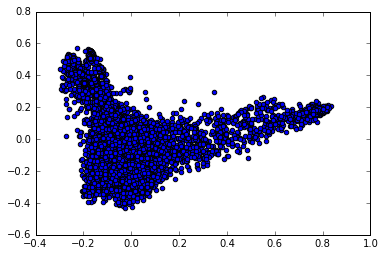

In [69]:
plt.scatter(TFidf_matrix_PCA[:,0], TFidf_matrix_PCA[:,1])

In [70]:
from sklearn.cluster import KMeans

In [71]:
kmeans=KMeans(n_clusters=15)

In [73]:
kmeans_pred=kmeans.fit_predict(Tfidf_matrix)

In [74]:
kmeans_pred[0]

7

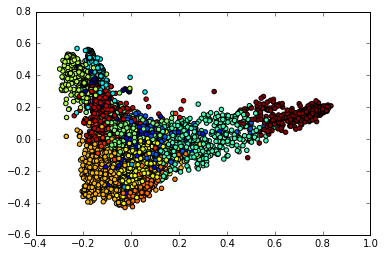

In [75]:
plt.scatter(TFidf_matrix_PCA[:,0], TFidf_matrix_PCA[:,1], c=kmeans_pred)

In [76]:
cluster0=[]
for i in range(10000):
    if kmeans_pred[i]==0:
        cluster0.append(data['title'][i])

In [77]:
len(cluster0)

225

In [78]:
print(cluster0)

['Heilongjiang', 'Muri bei Bern', 'Utrecht (province)', 'Samaná Province', 'Sierre', 'Saint-Maurice, Switzerland', 'Obwalden', 'Kreuzlingen', 'Diessenhofen', 'Amlikon-Bissegg', 'Mendrisio (district)', 'Glarus (city)', 'Morbio Inferiore', 'Vacallo', 'Homburg, Switzerland', 'Salenstein', 'Baden, Switzerland', 'Benzenschwil', 'Adelboden', 'Zeiningen', 'Buchs, Aargau', 'Kerns', 'Wiliberg', 'Wegenstetten', 'Tegerfelden', 'Staffelbach', 'Sisseln', 'Fischbach-Göslikon', 'Gränichen', 'Hallwil', 'Herznach', 'Holziken', 'Ittenthal', 'Killwangen', 'Pleujouse', 'Kölliken', 'Saint-Ursanne', 'Sarmenstorf', 'Biasca', 'Bioggio', 'Seleute', 'Boécourt', 'Mollis', 'Niederurnen', 'Campo (Blenio)', 'Cevio', 'Hirschaid', 'Giubiasco', 'Gnosca', 'Lavizzara', 'Lugaggia', 'Magadino', 'Manno', 'Novazzano', 'Onsernone', 'Porza', 'Saulcy', 'Torricella-Taverne', 'Valcolla', 'Vergeletto', 'Allmendingen bei Bern', 'Steinhausen, Switzerland', 'Bargen, Schaffhausen', 'Guntmadingen', 'Hemmental', 'Oberhallau', 'Ramsen',

In [79]:
cluster1=[]
for i in range(10000):
    if kmeans_pred[i]==1:
        cluster1.append(data['title'][i])

In [80]:
len(cluster1)

586

In [81]:
print(cluster1)

['Jazz', 'Samba', 'David Bowie', 'Alabama Song', 'Queen (band)', 'The Corrs', 'The Who', 'Round', 'Eminem', 'Adam Clayton', 'Mariah Carey', 'Jimmy Eat World', 'Johnny Nash', 'Ministry (band)', 'Mersey Beat', 'Tom Jones (singer)', 'Trent Reznor', 'Singer', 'Keyboardist', 'Dusty Springfield', 'Muse', 'Kiss (band)', 'Anne Murray', 'Anastacia', 'Jon Bon Jovi', 'Faith No More', 'The Pretenders', 'Reunion', 'Meat Puppets', 'Musical genre', 'Funk', 'My Fair Lady', 'The Jam', 'Yoshiki', 'Conducting', 'Counterpoint', 'Opus number', 'Concerto grosso', 'Basso continuo', 'Acoustic guitar', 'Orchestration', 'Dead Kennedys', 'Miri Ben-Ari', 'Nikolai Rimsky-Korsakov', 'Turbofolk', 'Belinda (entertainer)', 'Studio', 'MTV', 'Chad Kroeger', 'Ketsumeishi', 'Icon (disambiguation)', 'Jean Sibelius', 'Jermaine Jackson', 'Tom Evans', 'Harry Connick, Jr.', 'Talent', 'Symphonic poem', 'Protection', 'Viol', 'Camille Saint-Saëns', 'TVXQ', 'Oi!', 'Kiss (album)', 'Destroyer (album)', 'Animalize', 'Crazy Nights', '

In [82]:
cluster2=[]
for i in range(10000):
    if kmeans_pred[i]==2:
        cluster2.append(data['title'][i])

In [83]:
print(cluster2)

['Chess', 'Boss', 'Mario', 'Wario Land 4', 'Minesweeper (video game)', 'Solitaire', 'Half-Life (video game)', 'Gizmondo', 'Half-Life 2', 'Doom', 'Game show', 'Wii', 'Massively multiplayer online role-playing game', 'The Crystal Maze', 'Blockbusters', 'Asian Games', 'Yu-Gi-Oh!', 'Rock, paper, scissors', "Des O'Connor", 'N-Gage', 'Gear (disambiguation)', 'Sega Game Gear', 'Dirge of Cerberus: Final Fantasy VII', 'The Legend of Zelda (video game)', 'Genesis Nomad', 'SkyOS', 'Queen (chess)', 'Guys and Dolls', '1968 Summer Olympics', '1972 Summer Olympics', '1964 Winter Olympics', '1944 Summer Olympics', 'Airsoft', 'Jeu de paume', 'Pallone', 'Palla', 'Gunpei Yokoi', 'Guitar Hero (video game)', 'Omega', 'Pack-in game', 'Chuck Barris', 'Guitar Hero: On Tour', 'Ratchet & Clank (video game)', 'Ratchet & Clank: Going Commando', 'Tekken', 'Castle (disambiguation)', 'Space Invaders', 'Obsidian (disambiguation)', "Smuggler's Run", 'Fox Interactive', 'Super Mario Bros. Deluxe', 'Soulcalibur', 'Intera